## ML Capstone Project - Air Pollution

### Introduction:

    The provided dataset on Kaggle offers comprehensive insights into air quality analysis in the United States from 2000 to 2022. It contains detailed information on key pollutants such as Nitrogen Dioxide (NO2), Sulphur Dioxide (SO2), Carbon Monoxide (CO), and Ozone (O3). This dataset is sourced from the U.S. Environmental Protection Agency (EPA) and includes additional enhancements by Kagglers BrendaSo and ANGELA KIM. Students can leverage this dataset for in-depth research, analysis, and exploration of air quality trends and environmental health studies.

### Business Problem:


    Comprehensive Analysis and Mitigation Strategy Development for Air Pollution in the United States.

### Title:

    Air Quality Analysis in the United States (2000-2022).

### Data Dictionary:

    Date: Date of data collection.
    Address: Specific location of data collection.
    State: U.S. state where data was collected.
    County: County within the state of data collection.
    City: City where data was collected.
    O3 Mean: Average Ozone level for the day.
    O3 1st Max Value: Highest Ozone level for the day.
    O3 1st Max Hour: Hour of highest Ozone level.
    O3 AQI: Air Quality Index for Ozone.
    CO Mean: Average Carbon Monoxide level for the day.
    CO 1st Max Value: Highest Carbon Monoxide level for the day.
    CO 1st Max Hour: Hour of highest Carbon Monoxide level.
    CO AQI: Air Quality Index for Carbon Monoxide.
    SO2 Mean: Average Sulphur Dioxide level for the day.
    SO2 1st Max Value: Highest Sulphur Dioxide level for the day.
    SO2 1st Max Hour: Hour of highest Sulphur Dioxide level.
    SO2 AQI: Air Quality Index for Sulphur Dioxide.
    NO2 Mean: Average Nitrogen Dioxide level for the day.
    NO2 1st Max Value: Highest Nitrogen Dioxide level for the day.
    NO2 1st Max Hour: Hour of highest Nitrogen Dioxide level.

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data:

In [2]:
df = pd.read_csv(r'C:\Users\DELL\ML\ML Project\Data\pollution_2000_2023.csv')
df.head()

,Unnamed: 0,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [3]:
df.shape

(665414, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665414 entries, 0 to 665413
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         665414 non-null  int64  
 1   Date               665414 non-null  object 
 2   Address            665414 non-null  object 
 3   State              665414 non-null  object 
 4   County             665414 non-null  object 
 5   City               665414 non-null  object 
 6   O3 Mean            665414 non-null  float64
 7   O3 1st Max Value   665414 non-null  float64
 8   O3 1st Max Hour    665414 non-null  int64  
 9   O3 AQI             665414 non-null  int64  
 10  CO Mean            665414 non-null  float64
 11  CO 1st Max Value   665414 non-null  float64
 12  CO 1st Max Hour    665414 non-null  int64  
 13  CO AQI             665414 non-null  float64
 14  SO2 Mean           665414 non-null  float64
 15  SO2 1st Max Value  665414 non-null  float64
 16  SO

#### Droping unrelated columns

In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Date,Address,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2000-01-01,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,0.040,10,37,0.878947,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,2000-01-02,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.032,10,30,1.066667,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2000-01-03,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,0.016,9,15,1.762500,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,2000-01-04,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,0.033,9,31,1.829167,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,2000-01-05,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,0.012,9,11,2.700000,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


#### Changing datatypes of columns

In [6]:
col = ['CO AQI', 'SO2 AQI']
for i in col:
    df[i] = df[i].astype('int')

In [7]:
df['CO AQI'].dtype

dtype('int32')

In [8]:
df['SO2 AQI'].dtype

dtype('int32')

In [9]:
df.describe()

,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000,665414.000000
mean,0.028605,0.038980,10.766409,39.137872,0.329459,0.465604,5.922553,5.247399,1.428759,3.931057,8.867280,5.154743,11.510561,23.253519,11.588897,21.766209
std,0.012151,0.014912,3.297315,22.253413,0.275725,0.434542,7.719537,5.010467,2.410071,7.700799,6.776779,10.371465,8.957527,15.264335,7.888301,14.447780
min,-0.000706,0.000000,7.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,0.019824,0.029000,9.000000,27.000000,0.175000,0.200000,0.000000,2.000000,0.173913,0.600000,3.000000,0.000000,4.860870,11.000000,5.000000,10.000000
50%,0.028353,0.038000,10.000000,35.000000,0.258333,0.300000,1.000000,3.000000,0.604167,1.400000,8.000000,1.000000,9.304348,21.000000,9.000000,20.000000
75%,0.036882,0.048000,11.000000,44.000000,0.408696,0.600000,9.000000,7.000000,1.604545,4.000000,13.000000,6.000000,15.958333,33.000000,20.000000,31.000000
max,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,371.700000,23.000000,153.000000


## EDA

Problem 1 : Distribution of Ozone (O3) levels across different states in the United States over the years 2000-2023.

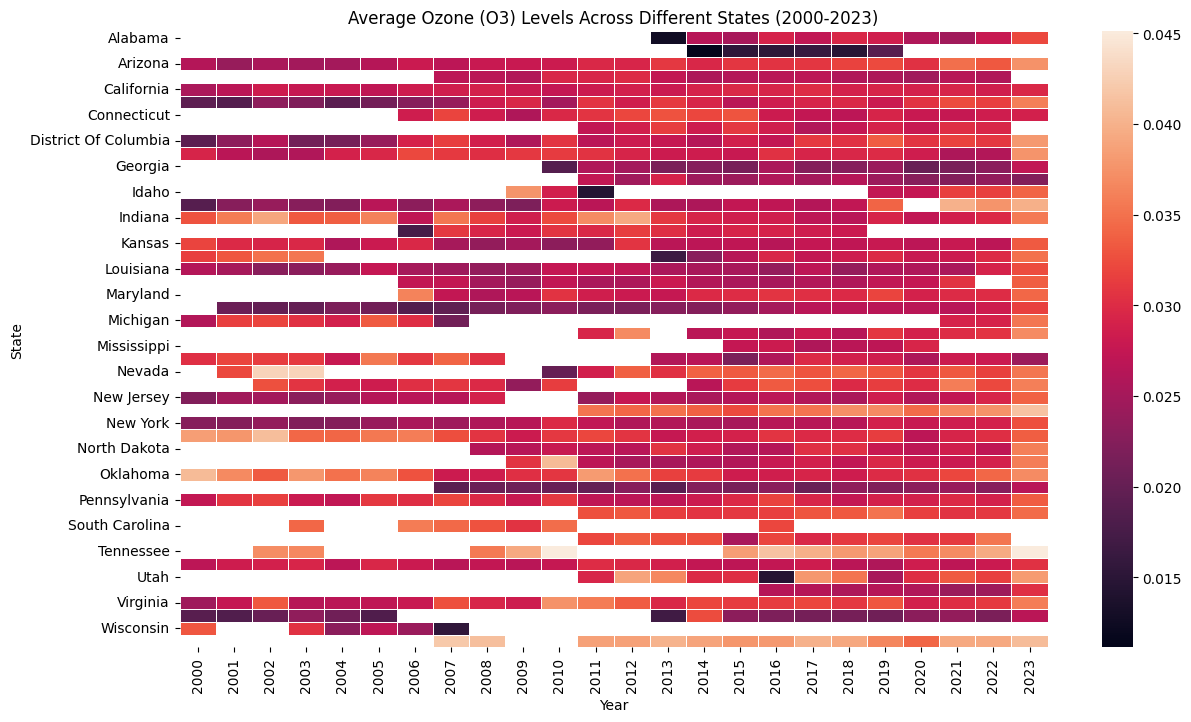

In [10]:
# Filter data for O3 levels
O3_mean_data = df.loc[:,('Date','State','O3 Mean')]
# Convert Date column to datetime
O3_mean_data['Date'] = pd.to_datetime(O3_mean_data['Date'])
# Extract year from the Date column
O3_mean_data['Year'] = O3_mean_data['Date'].dt.year
# Group by State and Year, calculate the mean O3 levels
O3_mean_by_state_year = O3_mean_data.groupby(['State', 'Year'])['O3 Mean'].mean().reset_index()
# Pivot the table for visualization
O3_mean_pivot = O3_mean_by_state_year.pivot(index='State', columns='Year', values='O3 Mean')
# Plotting
plt.figure(figsize=(14, 8))
sns.heatmap(O3_mean_pivot, linewidth=.5)
plt.title('Average Ozone (O3) Levels Across Different States (2000-2023)')
plt.xticks(rotation=90)
plt.show()



Problem 2 : Time series analysis to identify long-term trends in Carbon Monoxide (CO) levels in major cities across different states.

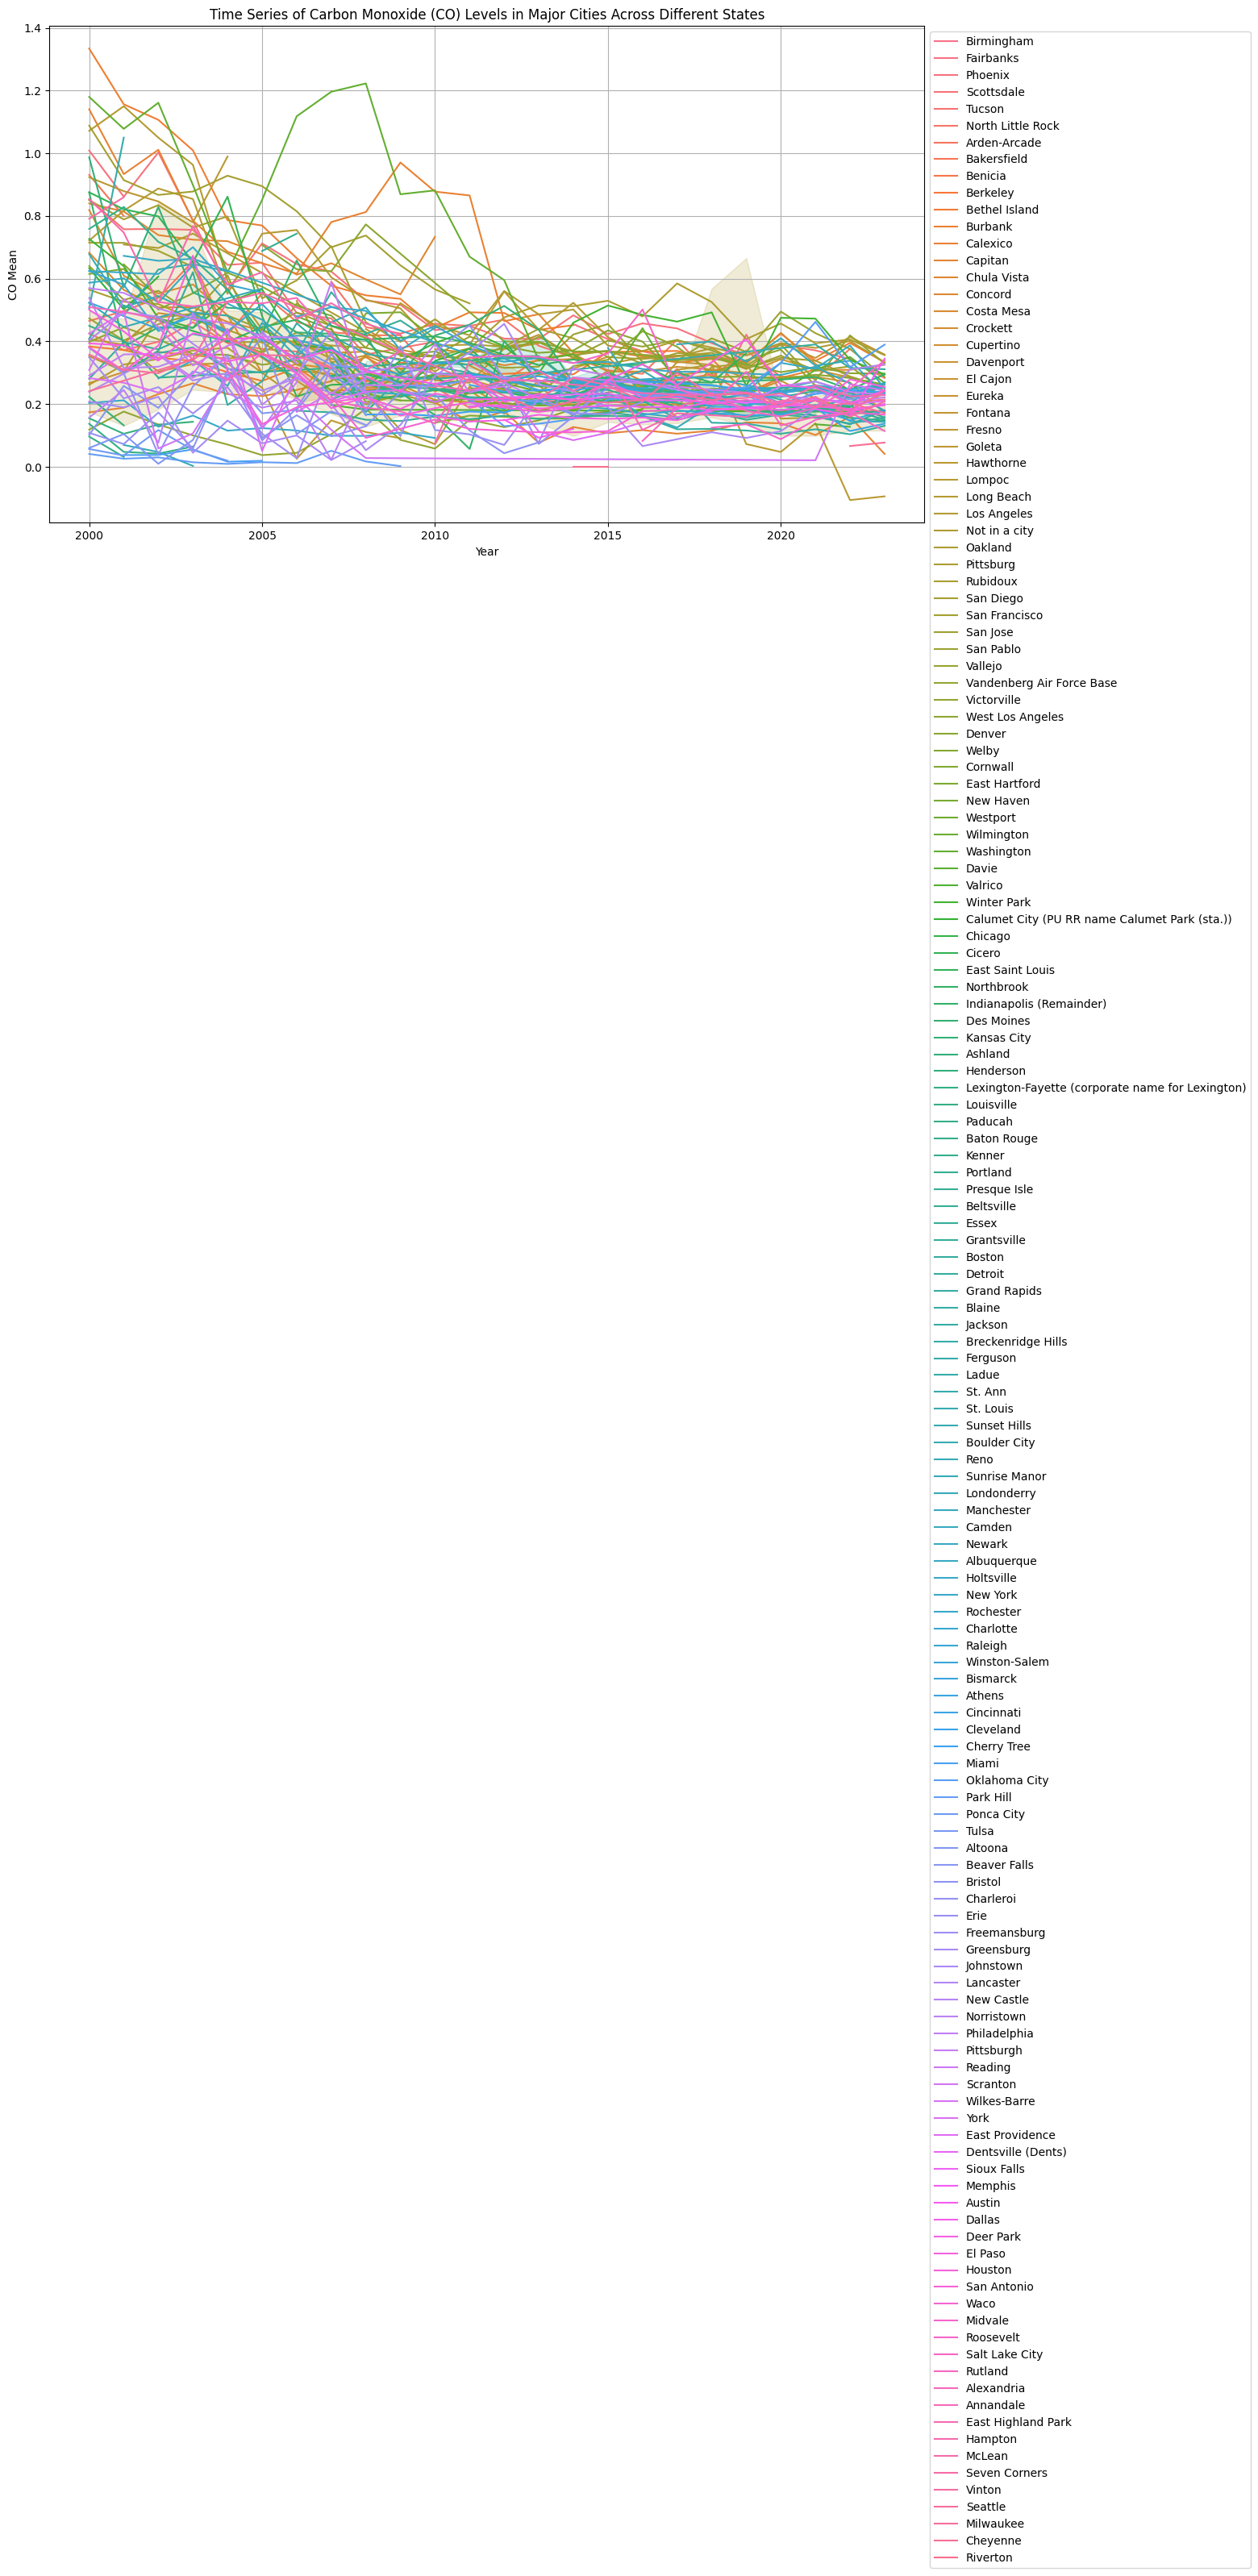

In [11]:
# Filter data for CO levels and relevant columns
co_data = df.loc[:,('Date', 'City', 'State', 'CO Mean')]

# Convert Date column to datetime
co_data['Date'] = pd.to_datetime(co_data['Date'])

# Extract year from the Date column
co_data['Year'] = co_data['Date'].dt.year

# Group by City and Year, calculate the mean CO levels
co_mean_by_city_year = co_data.groupby(['State', 'City', 'Year'])['CO Mean'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 8))

# Use seaborn lineplot to visualize the time series
sns.lineplot(data=co_mean_by_city_year, x='Year', y='CO Mean', hue='City')

plt.title('Time Series of Carbon Monoxide (CO) Levels in Major Cities Across Different States')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Problem 3 : Examine the relationships between different air pollutants (NO2, SO2, CO, O3) and their respective Air Quality Index (AQI) values.

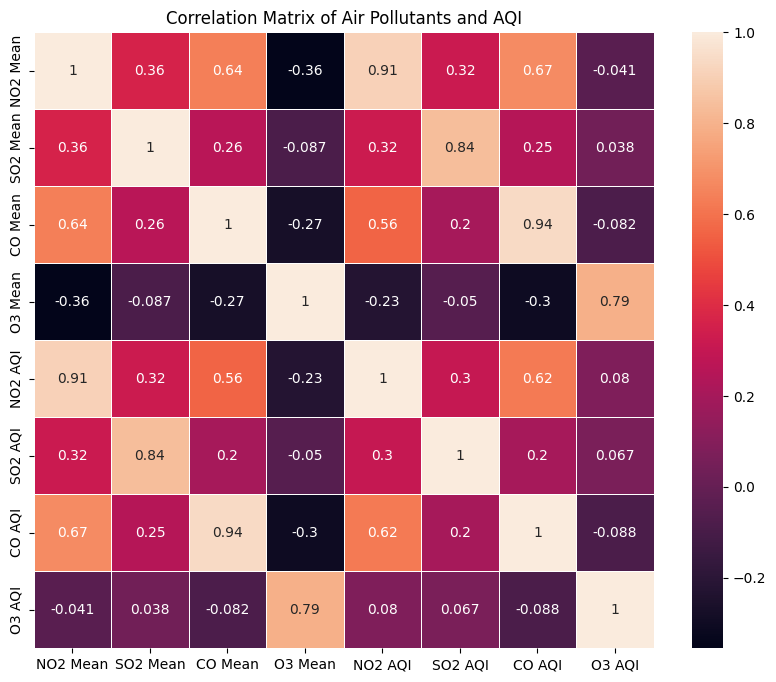

In [12]:
# Filter relevant columns
pollutants_and_aqi = df.loc[:,('NO2 Mean', 'SO2 Mean', 'CO Mean', 'O3 Mean', 'NO2 AQI', 'SO2 AQI', 'CO AQI', 'O3 AQI')]

# Calculate correlation matrix
correlation_matrix = pollutants_and_aqi.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, linewidth = 0.5)
plt.title('Correlation Matrix of Air Pollutants and AQI')
plt.show()

Problem 4 : Identify the top 10 cities with the highest average Ozone levels throughout the dataset's timeframe.

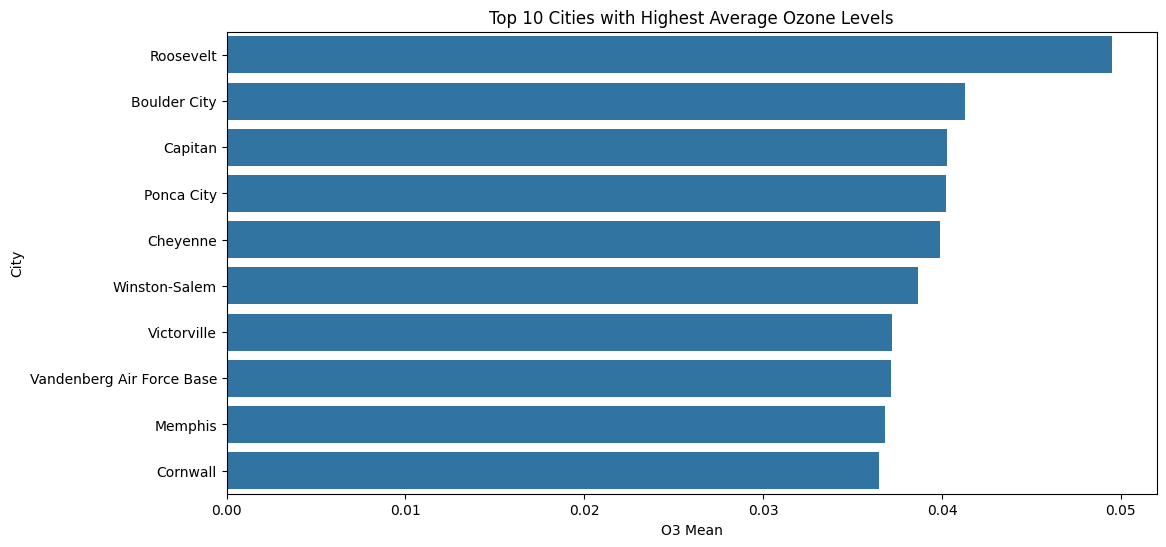

In [13]:
# Calculate the average Ozone levels for each city
avg_ozone_by_city = df.groupby('City')['O3 Mean'].mean()
    
# Sort the cities based on average Ozone levels in descending order
top_10_cities = avg_ozone_by_city.sort_values(ascending=False).head(10).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data = top_10_cities, x = 'O3 Mean', y = 'City')
plt.title('Top 10 Cities with Highest Average Ozone Levels')
plt.show()

Problem 5 :  Visualize the trend of each pollutant (O3, CO, SO2, NO2) over the years 2000-2022 at the national level.

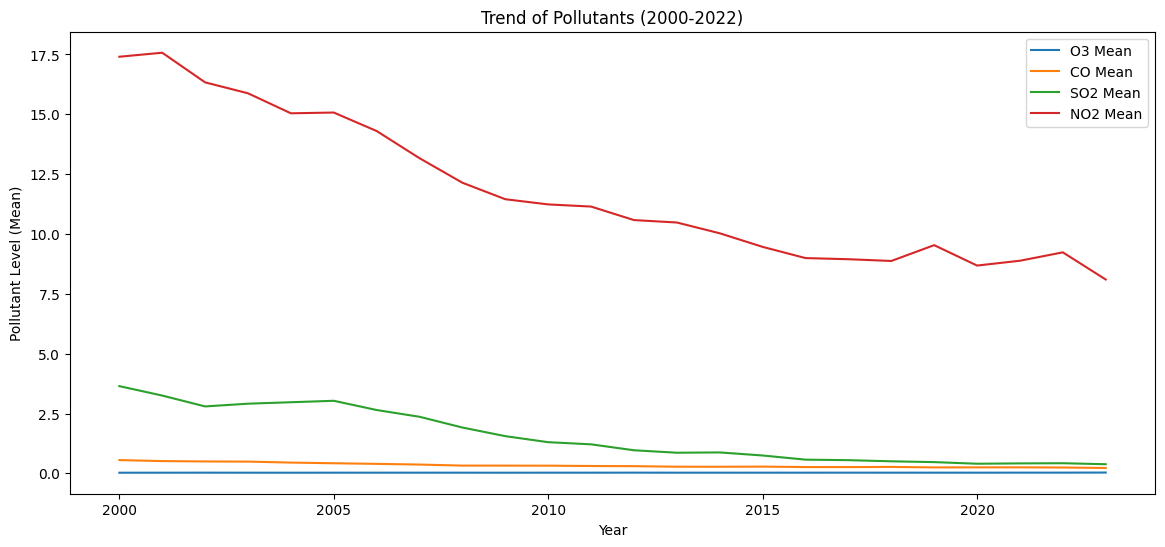

In [14]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the date
df['Year'] = df['Date'].dt.year

# Group data by year and calculate the mean of each pollutant
pollutants = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']
pollutant_trends = df.groupby('Year')[pollutants].mean()

# Plotting the trends
plt.figure(figsize=(14, 6))

for pollutant in pollutants:
    plt.plot(pollutant_trends.index, pollutant_trends[pollutant], label=pollutant)

plt.title('Trend of Pollutants (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Pollutant Level (Mean)')
plt.legend()
plt.show()

Problem 6 : Calculate and visualize the average SO2 AQI for each state over the dataset's timeframe.

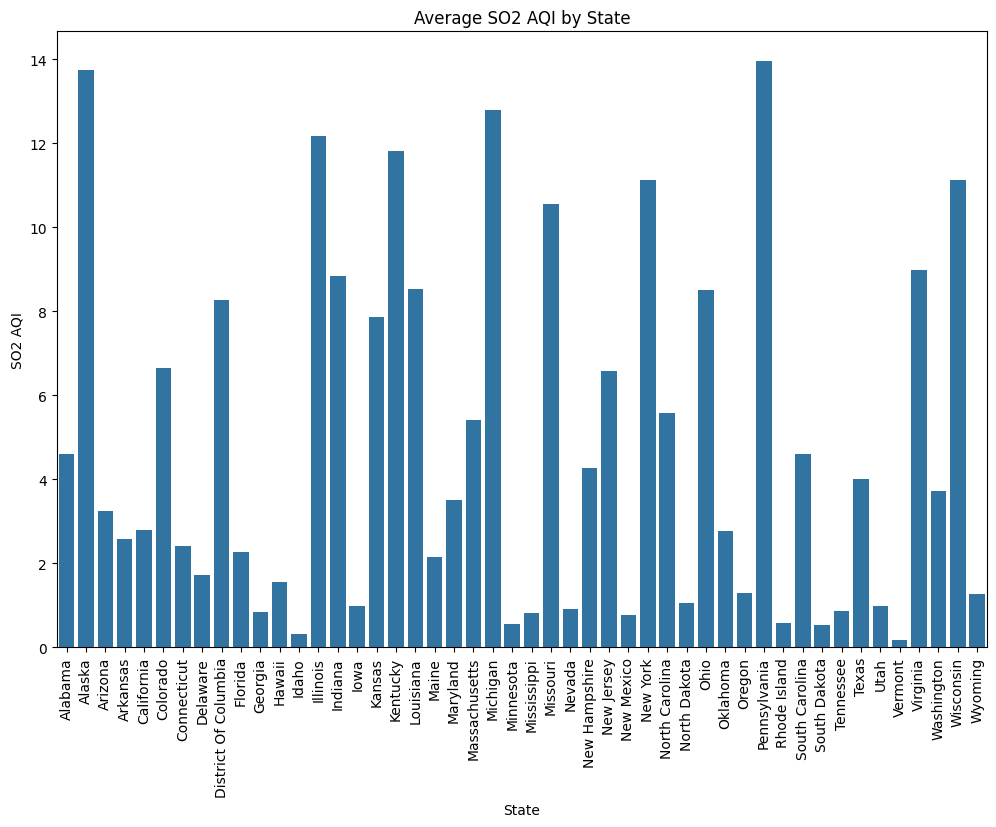

In [15]:
# Calculate the average SO2 AQI for each state
avg_so2_aqi_by_state = df.groupby('State')['SO2 AQI'].mean().reset_index()

# Plotting the average SO2 AQI for each state using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='SO2 AQI', data=avg_so2_aqi_by_state)
plt.title('Average SO2 AQI by State')
plt.xticks(rotation=90)
plt.show()

Problem 7 : Identify the top 10 cities with the highest and lowest levels of Nitrogen Dioxide (NO2) pollution over the entire dataset period.

C:\Users\DELL\AppData\Local\Temp\ipykernel_6184\480866270.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_no2_cities, x='NO2 Mean', y='City',palette='viridis')


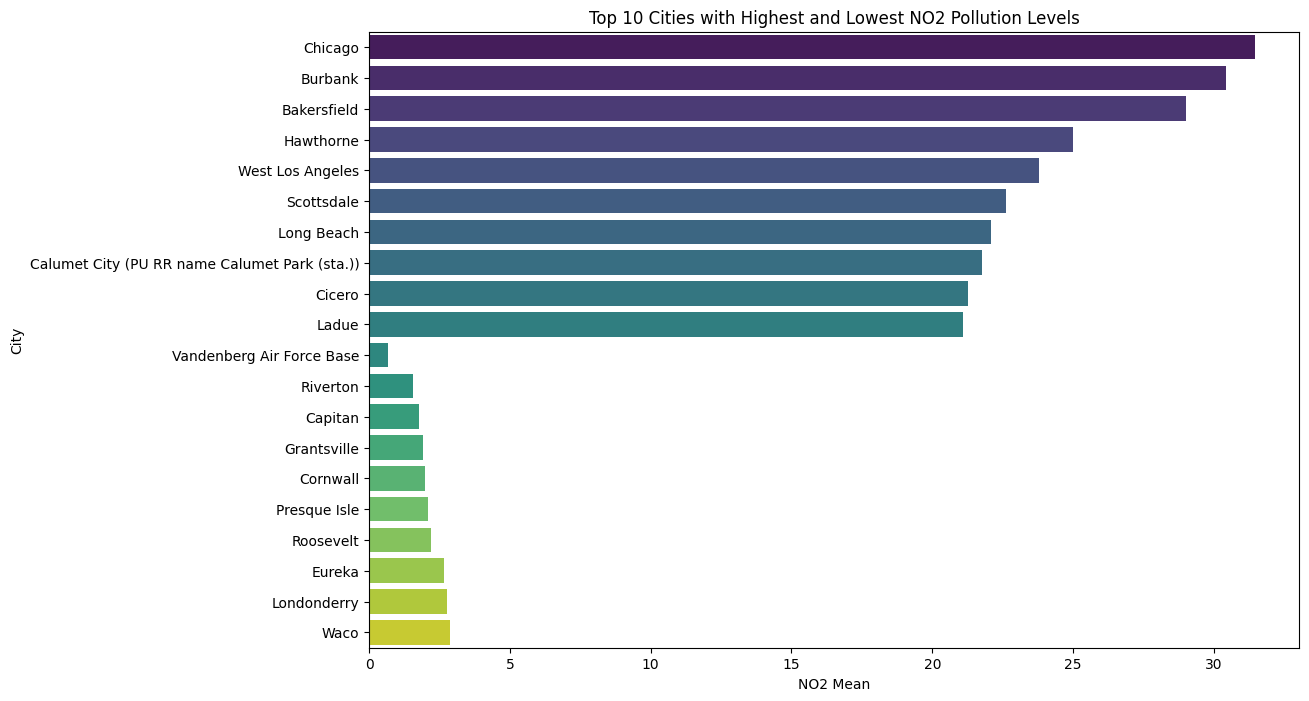

In [16]:
# Filter data for NO2 levels and relevant columns
no2_data = df.loc[:,('City', 'NO2 Mean')]

# Group by city and calculate the mean NO2 levels
mean_no2_by_city = no2_data.groupby('City')['NO2 Mean'].mean().reset_index()

# Sort cities by mean NO2 levels
top_10_highest_no2_cities = mean_no2_by_city.sort_values(by='NO2 Mean', ascending=False).head(10)
top_10_lowest_no2_cities = mean_no2_by_city.sort_values(by='NO2 Mean').head(10)

# Concatenate the top 10 highest and lowest cities
top_10_no2_cities = pd.concat([top_10_highest_no2_cities, top_10_lowest_no2_cities])

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_no2_cities, x='NO2 Mean', y='City',palette='viridis')
plt.title('Top 10 Cities with Highest and Lowest NO2 Pollution Levels')
plt.show()

Problem 8 : Calculate the annual percentage change in Air Quality Index (AQI) values for each pollutant and visualize the results.

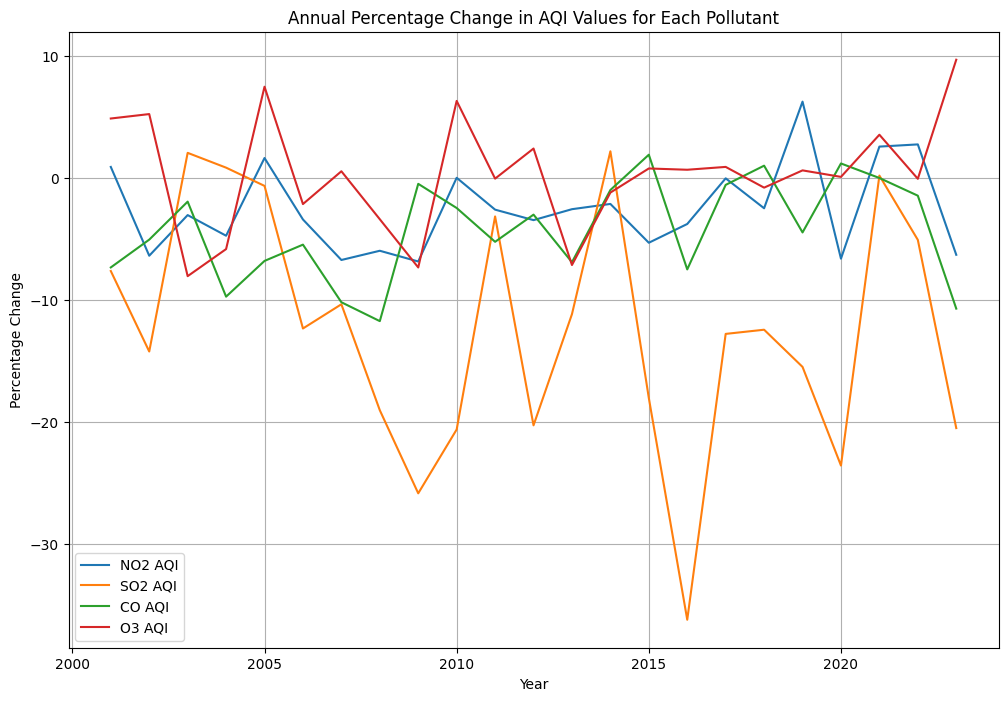

In [22]:
# Filter relevant columns
aqi_data = df.loc[:,('Year', 'NO2 AQI', 'SO2 AQI', 'CO AQI', 'O3 AQI')]

# Group by year and calculate the mean AQI values for each pollutant
mean_aqi_by_year = aqi_data.groupby('Year').mean()

# Calculate annual percentage change for each pollutant
annual_percentage_change = mean_aqi_by_year.pct_change() * 100

# Plotting
plt.figure(figsize=(12, 8))

# Iterate over each pollutant and plot its annual percentage change
for pollutant in annual_percentage_change.columns:
    plt.plot(annual_percentage_change.index, annual_percentage_change[pollutant], label=pollutant)

plt.title('Annual Percentage Change in AQI Values for Each Pollutant')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Adding month and day in dataset
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

Problem 9 : Calculate daily, monthly, and yearly averages of each air pollutant (NO2, SO2, CO, O3) across all states.

In [24]:
data = df.loc[:,('Day','Month','Year','O3 Mean','CO Mean','SO2 Mean','NO2 Mean')]
def calculate_averages(data):
    
    # Calculate daily averages
    daily_averages = data.groupby(['Year', 'Month','Day']).mean().reset_index()
    
    # Calculate monthly averages
    monthly_averages = data.groupby(['Year','Month']).mean().reset_index()
    
    # Calculate yearly averages
    yearly_averages = data.groupby('Year').mean().reset_index()
    
    return daily_averages, monthly_averages, yearly_averages

# Calculate averages
daily_avg, monthly_avg, yearly_avg = calculate_averages(data)

# Print the results
print("Daily Averages:")
print(daily_avg.head())
print("\nMonthly Averages:")
print(monthly_avg.head())
print("\nYearly Averages:")
print(yearly_avg.head())

Daily Averages:
   Year  Month  Day   O3 Mean   CO Mean  SO2 Mean   NO2 Mean
0  2000      1    1  0.020742  0.773897  4.346910  18.508666
1  2000      1    2  0.021207  0.590316  3.438415  14.692258
2  2000      1    3  0.013568  0.880811  3.390395  23.830700
3  2000      1    4  0.013322  1.006128  2.758615  24.160910
4  2000      1    5  0.016361  1.009010  3.006528  23.804671

Monthly Averages:
   Year  Month        Day   O3 Mean   CO Mean  SO2 Mean   NO2 Mean
0  2000      1  16.118017  0.014521  0.948309  3.866951  23.425019
1  2000      2  14.895746  0.021125  0.715586  3.426367  20.960138
2  2000      3  16.300063  0.027074  0.537657  3.161874  17.715628
3  2000      4  15.586100  0.030665  0.469062  3.377199  16.140980
4  2000      5  16.091484  0.034551  0.421474  3.389836  15.031685

Yearly Averages:
   Year        Day     Month   O3 Mean   CO Mean  SO2 Mean   NO2 Mean
0  2000  15.761562  6.667127  0.026569  0.554411  3.643767  17.404993
1  2001  15.769339  6.730470  0.027640 

Problem 10 : Which states or cities have the highest and lowest levels of each air pollutant?

In [28]:
# Calculate average pollutant levels for each state and city
avg_pollutant_by_state = df.groupby('State').agg({'O3 Mean': 'mean', 'CO Mean': 'mean', 'SO2 Mean': 'mean', 'NO2 Mean': 'mean'})
avg_pollutant_by_city = df.groupby('City').agg({'O3 Mean': 'mean', 'CO Mean': 'mean', 'SO2 Mean': 'mean', 'NO2 Mean': 'mean'})

# Identify states with the highest and lowest levels of each pollutant
highest_pollutant_states = avg_pollutant_by_state.idxmax()
lowest_pollutant_states = avg_pollutant_by_state.idxmin()

# Identify cities with the highest and lowest levels of each pollutant
highest_pollutant_cities = avg_pollutant_by_city.idxmax()
lowest_pollutant_cities = avg_pollutant_by_city.idxmin()

# Print the results
print("States with the highest levels of each pollutant:")
print(highest_pollutant_states)

print("\nStates with the lowest levels of each pollutant:")
print(lowest_pollutant_states)

print("\nCities with the highest levels of each pollutant:")
print(highest_pollutant_cities)

print("\nCities with the lowest levels of each pollutant:")
print(lowest_pollutant_cities)

States with the highest levels of each pollutant:
O3 Mean                Tennessee
CO Mean     District Of Columbia
SO2 Mean                  Alaska
NO2 Mean                Colorado
dtype: object

States with the lowest levels of each pollutant:
O3 Mean        Alaska
CO Mean       Wyoming
SO2 Mean      Georgia
NO2 Mean    Tennessee
dtype: object

Cities with the highest levels of each pollutant:
O3 Mean         Roosevelt
CO Mean         Hawthorne
SO2 Mean    Seven Corners
NO2 Mean          Chicago
dtype: object

Cities with the lowest levels of each pollutant:
O3 Mean                       Chicago
CO Mean                      Riverton
SO2 Mean                   Des Moines
NO2 Mean    Vandenberg Air Force Base
dtype: object


Problem 11 : Are there any outliers or extreme events in air pollutant levels? How can they be identified and analyzed?

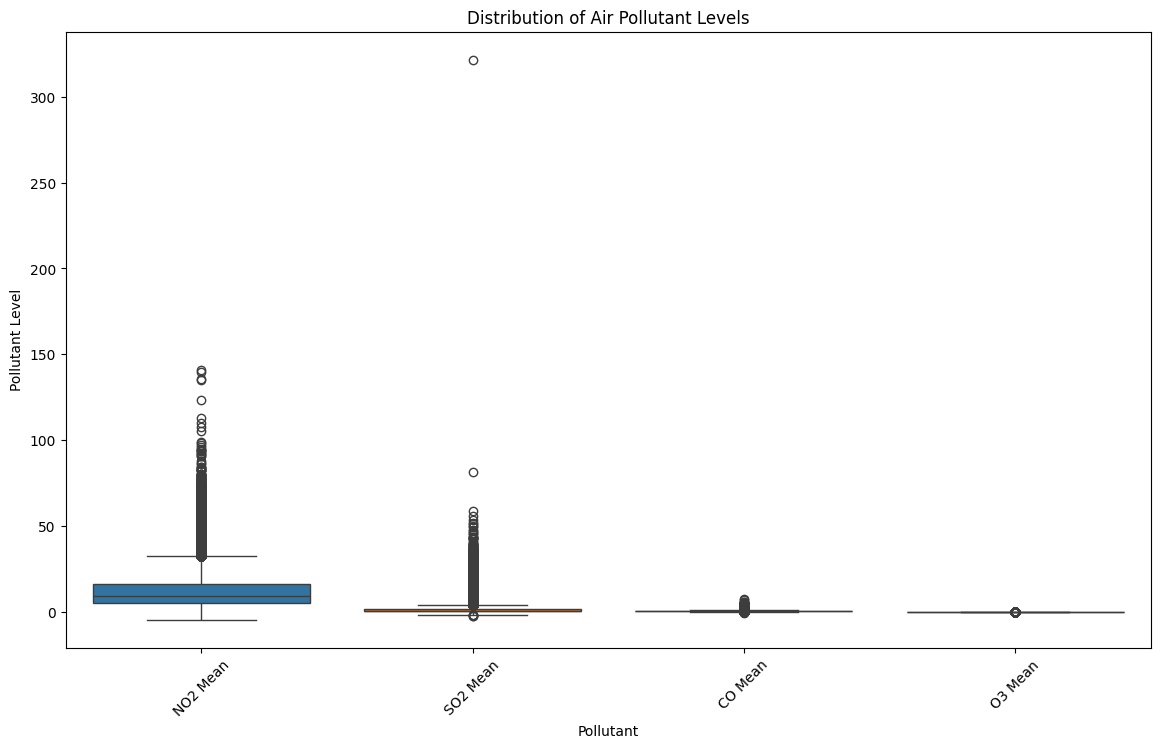

In [37]:
# Filter relevant columns
pollutants = df.loc[:,('NO2 Mean', 'SO2 Mean', 'CO Mean', 'O3 Mean')]

# Plot box plots for each pollutant
plt.figure(figsize=(14, 8))
sns.boxplot(data=pollutants)
plt.title('Distribution of Air Pollutant Levels')
plt.xlabel('Pollutant')
plt.ylabel('Pollutant Level')
plt.xticks(rotation=45)
plt.show()

Problem 12 : Design a heat map visualization to display variations in Sulphur Dioxide (SO2) levels across different counties in the United States.

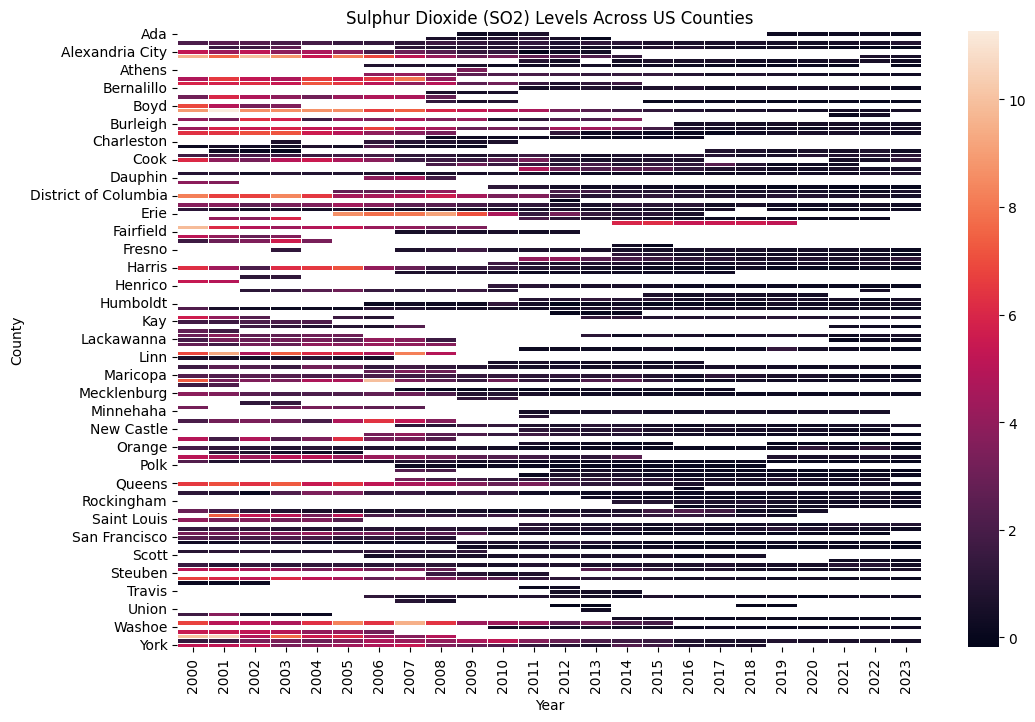

In [43]:
# Filter relevant columns
so2_data = df.loc[:,('Year','County','SO2 Mean')]
# Group by County and Year, calculate mean SO2 levels
so2_data_by_county_year = so2_data.groupby(['County', 'Year'])['SO2 Mean'].mean().reset_index()
# Pivot the table for visualization
so2_matrix = so2_data_by_county_year.pivot(index='County', columns='Year', values='SO2 Mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(so2_matrix, linewidth=.5)
plt.title('Sulphur Dioxide (SO2) Levels Across US Counties')
plt.xlabel('Year')
plt.ylabel('County')
plt.show()

Problem 13 : Design a heat map visualization to display variations in NO2 levels across different counties in the United States.

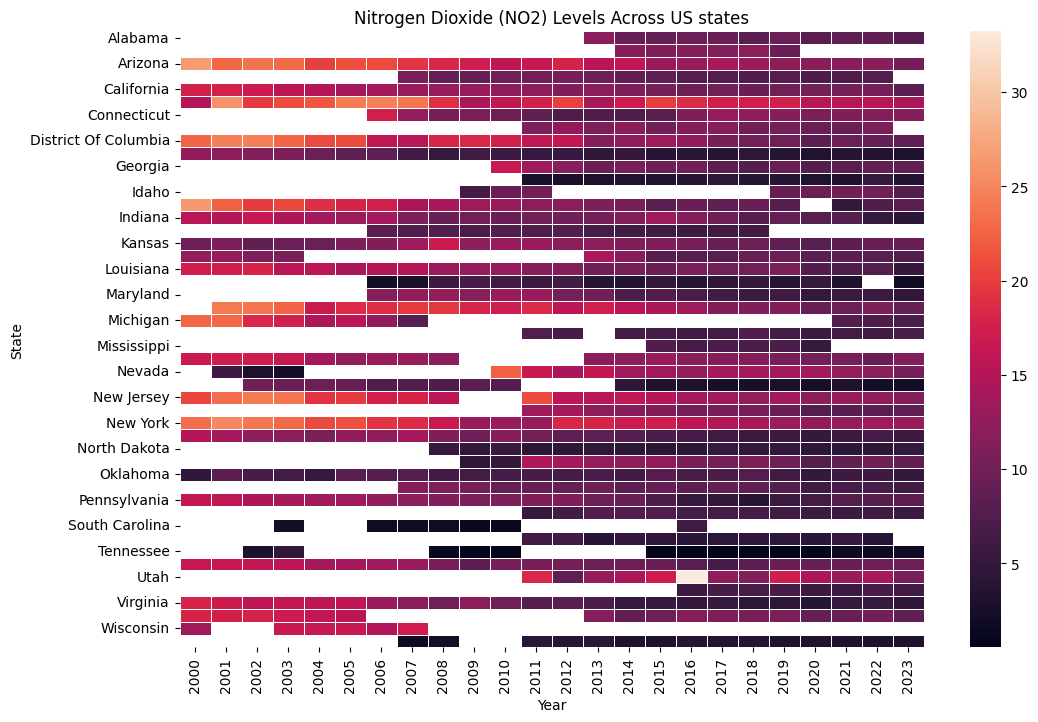

In [44]:
# Filter relevant columns
NO2_data = df.loc[:,('Year','State','NO2 Mean')]
# Group by state and Year, calculate mean SO2 levels
NO2_data_by_state_year = NO2_data.groupby(['State', 'Year'])['NO2 Mean'].mean().reset_index()
# Pivot the table for visualization
NO2_matrix = NO2_data_by_state_year.pivot(index='State', columns='Year', values='NO2 Mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(NO2_matrix, linewidth=.5)
plt.title('Nitrogen Dioxide (NO2) Levels Across US states')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

### Machine Learning Model :

Problem 14 : Can we build a predictive model to forecast future air pollutant levels based on historical data?

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select relevant features and target variables for each pollutant
X_o3 = df[['Year', 'Month', 'Day', 'O3 1st Max Value', 'O3 1st Max Hour']]  
y_o3 = df['O3 Mean']

X_so2 = df[['Year', 'Month', 'Day', 'SO2 1st Max Value', 'SO2 1st Max Hour']]  
y_so2 = df['SO2 Mean']

X_no2 = df[['Year', 'Month', 'Day', 'NO2 1st Max Value', 'NO2 1st Max Hour']]  
y_no2 = df['NO2 Mean']

X_co = df[['Year', 'Month', 'Day', 'CO 1st Max Value', 'CO 1st Max Hour']]  
y_co = df['CO Mean']

# Train-test split for each pollutant
X_train_o3, X_test_o3, y_train_o3, y_test_o3 = train_test_split(X_o3, y_o3, test_size=0.2, random_state=42)
X_train_so2, X_test_so2, y_train_so2, y_test_so2 = train_test_split(X_so2, y_so2, test_size=0.2, random_state=42)
X_train_no2, X_test_no2, y_train_no2, y_test_no2 = train_test_split(X_no2, y_no2, test_size=0.2, random_state=42)
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(X_co, y_co, test_size=0.2, random_state=42)

# Model training for each pollutant
model_o3 = LinearRegression()
model_so2 = LinearRegression()
model_no2 = LinearRegression()
model_co = LinearRegression()

model_o3.fit(X_train_o3, y_train_o3)
model_so2.fit(X_train_so2, y_train_so2)
model_no2.fit(X_train_no2, y_train_no2)
model_co.fit(X_train_co, y_train_co)

# Model evaluation for each pollutant
y_pred_o3 = model_o3.predict(X_test_o3)
mse_o3 = mean_squared_error(y_test_o3, y_pred_o3)
print("Mean Squared Error for O3:", mse_o3)

y_pred_so2 = model_so2.predict(X_test_so2)
mse_so2 = mean_squared_error(y_test_so2, y_pred_so2)
print("Mean Squared Error for SO2:", mse_so2)

y_pred_no2 = model_no2.predict(X_test_no2)
mse_no2 = mean_squared_error(y_test_no2, y_pred_no2)
print("Mean Squared Error for NO2:", mse_no2)

y_pred_co = model_co.predict(X_test_co)
mse_co = mean_squared_error(y_test_co, y_pred_co)
print("Mean Squared Error for CO:", mse_co)

Mean Squared Error for O3: 2.897089773521158e-05
Mean Squared Error for SO2: 2.1063686539773188
Mean Squared Error for NO2: 14.152469332571254
Mean Squared Error for CO: 0.008508746115742328


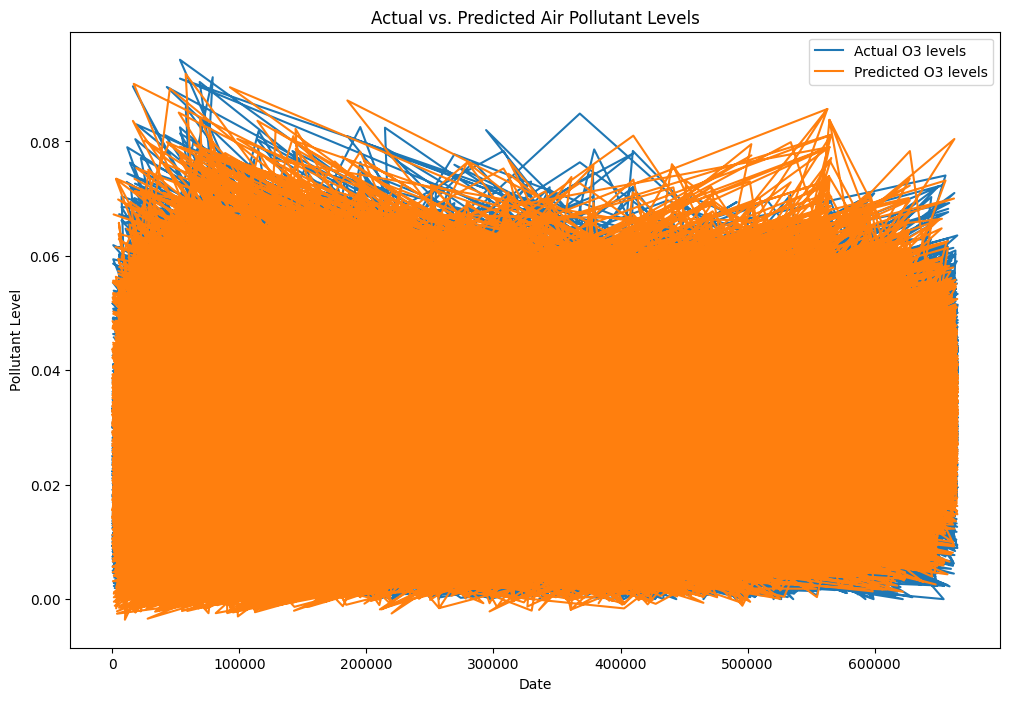

In [49]:
plt.figure(figsize=(12, 8))
plt.plot(X_test_o3.index, y_test_o3, label='Actual O3 levels')
plt.plot(X_test_o3.index, model_o3.predict(X_test_o3), label='Predicted O3 levels')
plt.title('Actual vs. Predicted Air Pollutant Levels')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.legend()
plt.show()

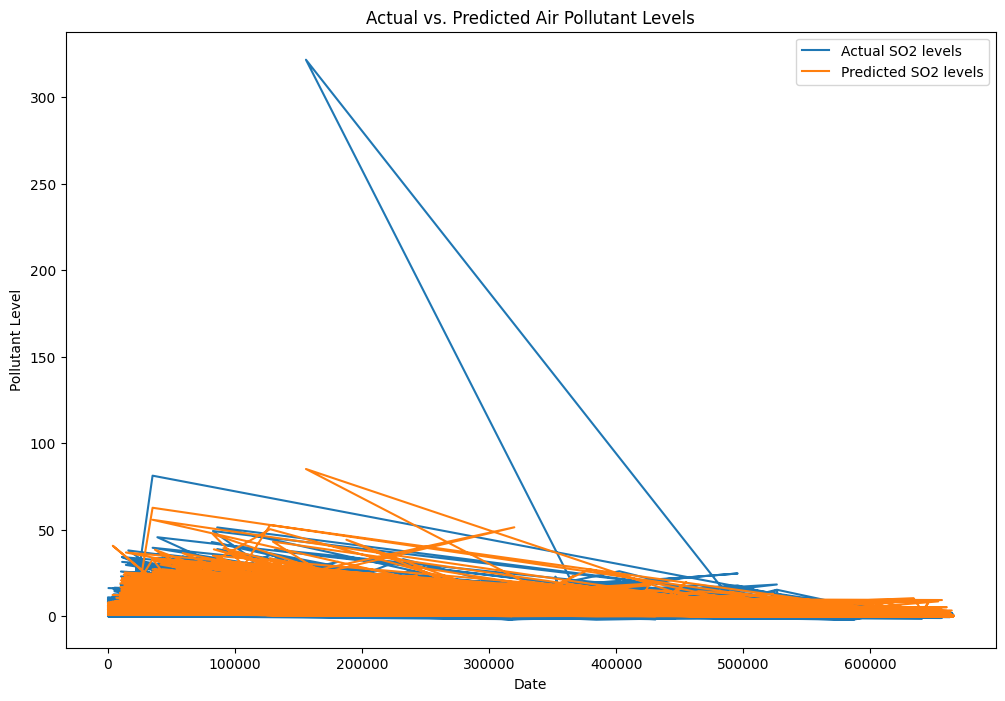

In [50]:
plt.figure(figsize=(12, 8))
plt.plot(X_test_so2.index, y_test_so2, label='Actual SO2 levels')
plt.plot(X_test_so2.index, model_so2.predict(X_test_so2), label='Predicted SO2 levels')
plt.title('Actual vs. Predicted Air Pollutant Levels')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.legend()
plt.show()

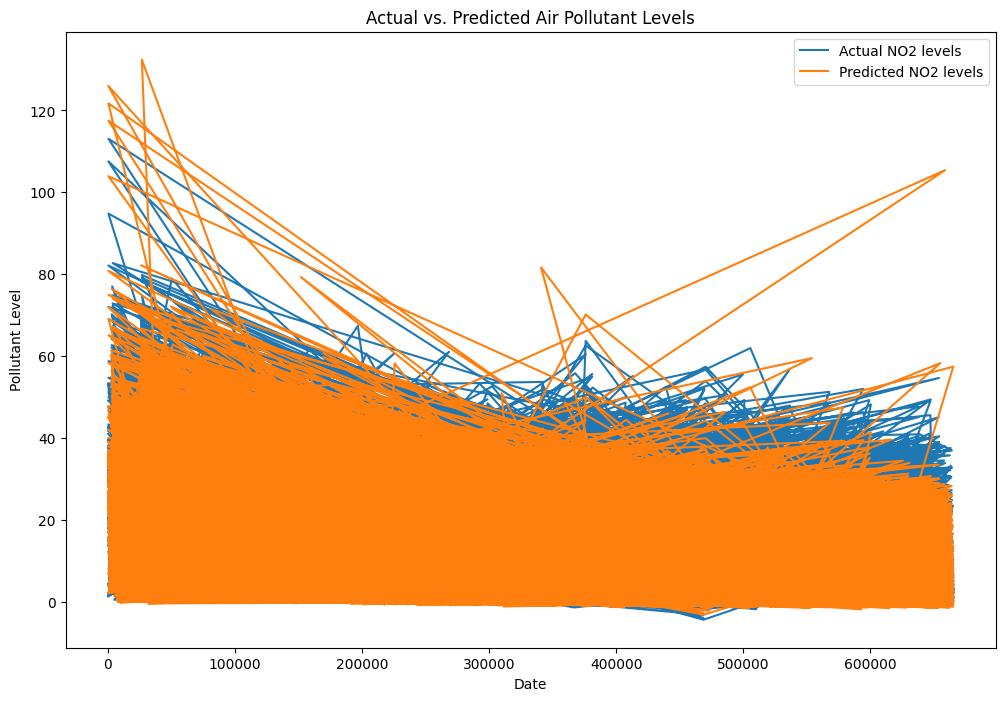

In [51]:
plt.figure(figsize=(12, 8))
plt.plot(X_test_no2.index, y_test_no2, label='Actual NO2 levels')
plt.plot(X_test_no2.index, model_no2.predict(X_test_no2), label='Predicted NO2 levels')
plt.title('Actual vs. Predicted Air Pollutant Levels')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.legend()
plt.show()

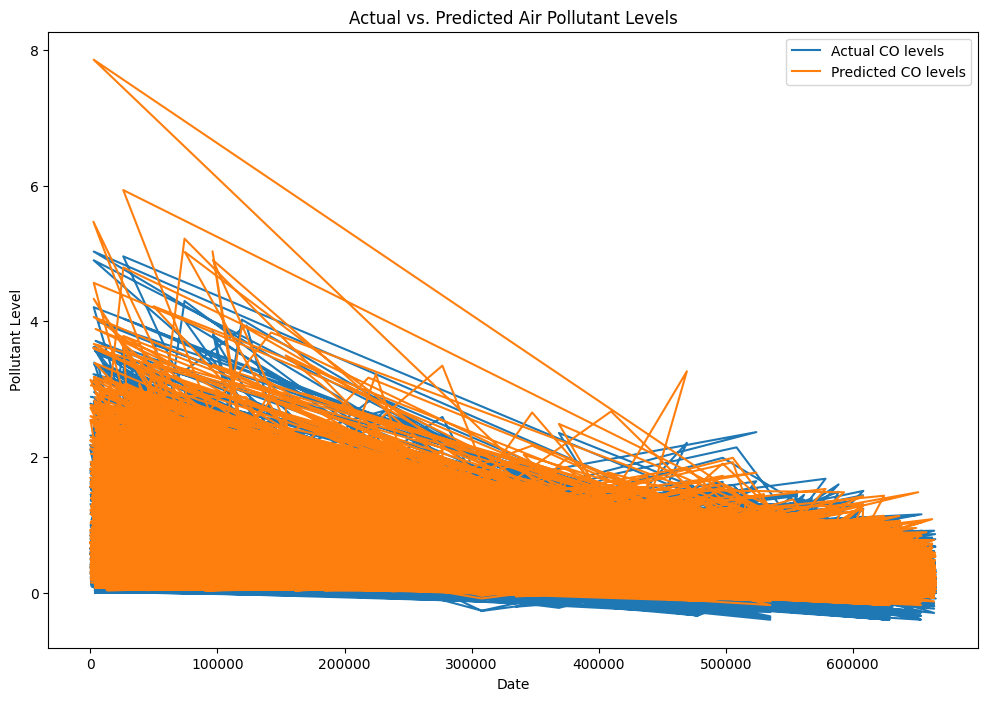

In [52]:
plt.figure(figsize=(12, 8))
plt.plot(X_test_co.index, y_test_co, label='Actual CO levels')
plt.plot(X_test_co.index, model_co.predict(X_test_co), label='Predicted CO levels')
plt.title('Actual vs. Predicted Air Pollutant Levels')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.legend()
plt.show()

Problem 15 : Build a predictive model in Python to forecast O3 Mean levels for the next year based on historical data from 2000-2022.

Mean Squared Error: 0.00014404420751682335


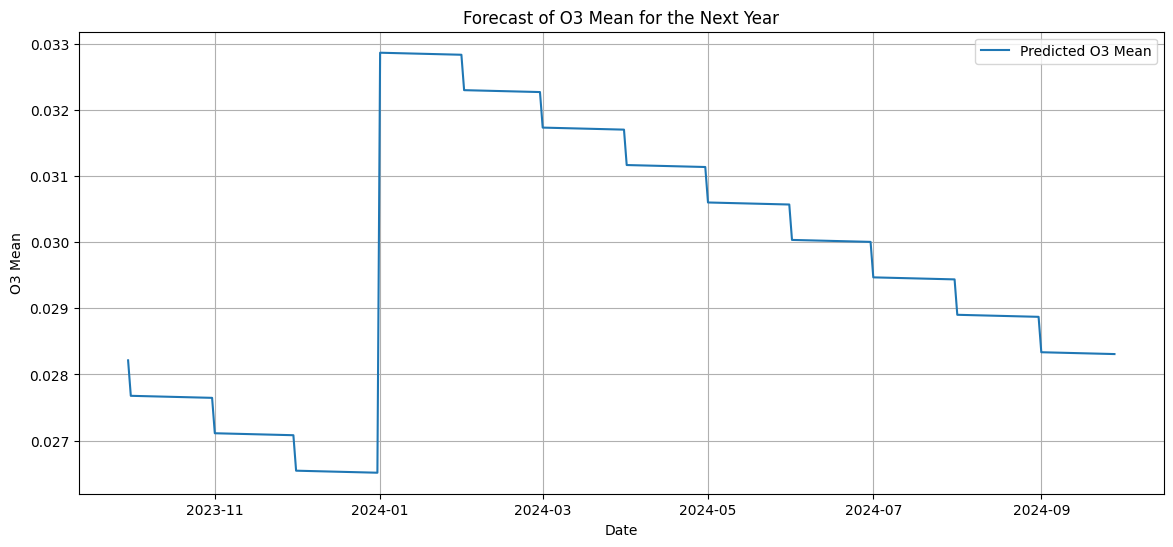

In [59]:
# Select relevant columns (assuming 'Year', 'Month', 'Day' and 'O3 Mean' columns exist)
Data = df.loc[:,('Date', 'Year', 'Month', 'Day', 'O3 Mean')]

# Prepare features (X) and target variable (y)
X = Data[['Year', 'Month', 'Day']]
y = Data['O3 Mean']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Forecast NO2 levels for the next year
# Assuming we have historical data up to the latest date in the dataset
latest_date = Data['Date'].max()
next_year = pd.date_range(start=latest_date, periods=365, freq='D')
next_year_data = pd.DataFrame({'Date': next_year})
next_year_data['Year'] = next_year_data['Date'].dt.year
next_year_data['Month'] = next_year_data['Date'].dt.month
next_year_data['Day'] = next_year_data['Date'].dt.day

# Make predictions for the next year
next_year_predictions = model.predict(next_year_data[['Year', 'Month', 'Day']])

# Plot the predictions
plt.figure(figsize=(14, 6))
plt.plot(next_year, next_year_predictions, label='Predicted O3 Mean')
plt.title('Forecast of O3 Mean for the Next Year')
plt.xlabel('Date')
plt.ylabel('O3 Mean')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion:


Temporal Trends: There are noticeable temporal trends in air pollutant levels over the years. Some pollutants may exhibit seasonal patterns, while others may show long-term trends.

Geographical Variations: Air pollutant levels vary significantly across different states and cities in the United States. Certain regions may consistently exhibit higher or lower levels of pollutants compared to others.

Outlier Detection: Outliers or extreme events in air pollutant levels can be identified and analyzed using visualization techniques such as box plots. These outliers may be indicative of unusual environmental conditions or specific events affecting air quality.

Predictive Modeling: Predictive models, such as linear regression, can be used to forecast future air pollutant levels based on historical data. These models can provide valuable insights for decision-making and planning related to environmental health and pollution control.

Policy Implications: The analysis of air quality data can inform the development of environmental policies and regulations aimed at reducing air pollution and mitigating its adverse effects on public health and the environment.


Overall, the dataset provides valuable information for understanding air quality trends, identifying areas of concern, and guiding efforts to improve air quality and public health outcomes. 